In [2]:
%matplotlib inline

import matplotlib.pyplot as plt

import numpy as np
import scipy as sp




In [3]:
def d20_ge(a):
    "The probability that a d20 is greater than or equal to a."
    out = (21. - a) / 20.0
    
    out = sp.where(out>=0.0, out, 0.0)
    out = sp.where(out<=1.0, out, 1.0)
    return out


print(d20_ge(6))
print(d20_ge(16))
print(d20_ge(20))

0.75
0.25
0.05


In [4]:
def adv_d20_ge(a):
    "Return the prob. of a roll >= a with advantage."
    out = d20_ge(a) + d20_ge(a) - d20_ge(a) * d20_ge(a)
    return out
def dis_d20_ge(a):
    "Return the prob. of a roll >= a with advantage."
    out = d20_ge(a) * d20_ge(a)
    return out

def adv_3d20_ge(a):
    "Return the prob. of at least one role >= a with advantage on three rolls."
    out = 1 - (1 - d20_ge(a))**3
    return out



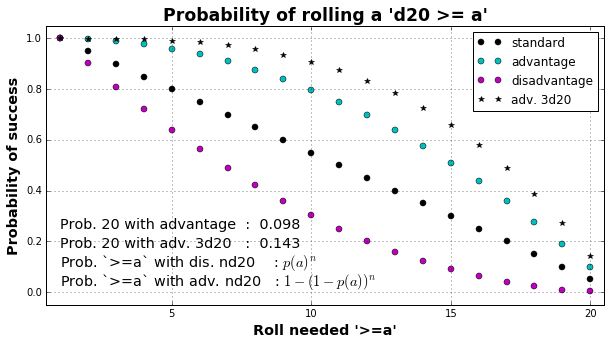

In [41]:
avec = sp.arange(1, 21)
ystandard = d20_ge(avec)
yadv = adv_d20_ge(avec)
ydis = dis_d20_ge(avec)
yadv_3d20 = adv_3d20_ge(avec)


fig = plt.figure(0, (10, 5))
ax0 = fig.add_subplot(1,1,1)

ax0.plot(avec, ystandard, 'ok', label='standard')
ax0.plot(avec, yadv, 'oc', label='advantage')
ax0.plot(avec, ydis, 'om', label='disadvantage')
ax0.plot(avec, yadv_3d20, '*k', label='adv. 3d20')

ax0.set_xbound(.5, 20.5)
ax0.set_ybound(-.05, 1.05)
ax0.legend(loc='best')
ax0.set_title("Probability of rolling a 'd20 >= a'", fontsize='xx-large', fontweight='bold')
ax0.set_xlabel("Roll needed '>=a'", fontsize='x-large', fontweight='bold')
ax0.set_ylabel("Probability of success", fontsize='x-large', fontweight='bold')
ax0.grid()
ax0.text(1, 0.25,  "Prob. 20 with advantage  : {0:6.2}".format(yadv[-1]), fontsize='x-large')
ax0.text(1, 0.175, "Prob. 20 with adv. 3d20   : {0:6.3}".format(yadv_3d20[-1]), fontsize='x-large')

ax0.text(1, 0.1, r"Prob. `>=a` with dis. nd20    : $p(a)^n$", fontsize='x-large')
ax0.text(1, 0.025, r"Prob. `>=a` with adv. nd20   : $1 - (1 - p(a))^n$", fontsize='x-large')

fig.savefig("/home/willm/Documents/dndgroup/advantage_table.jpg", dpi=150)